# 📘 Regresión Lineal Múltiple - Predicción de MatchKills

Usando múltiples variables como predictores.

## 1. Importar Librerías

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
for file_name in uploaded.keys():
    # Assuming the file is separated by semicolons based on the previous attempt
    df = pd.read_csv(file_name, sep=',') # Changed separator to comma

Saving AnexoET_RoundWinner_Limpio.csv to AnexoET_RoundWinner_Limpio (1).csv


## planteamiento 🧩
"Nos propusimos responder si es posible anticipar el rendimiento de un equipo en CS:GO utilizando datos como kills, headshots y equipamiento inicial. Para ello, entrenamos dos modelos: uno de clasificación para predecir si el equipo gana la ronda, y otro de regresión para estimar los kills.


In [6]:
# 🔧 Conversión de columnas numéricas escritas como texto con puntos
columnas_numericas = ['TimeAlive', 'MatchAssists', 'MatchHeadshots', 'TeamStartingEquipmentValue', 'MatchKills']

for col in columnas_numericas:
    # Check if the column exists before attempting to process
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('.', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


df = df.dropna(subset=columnas_numericas)
display(df.head())

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,0,True,False,False,...,0.0,0,0.0,0,750.0,44000,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,0,True,False,False,...,0.0,0,0.0,0,800.0,44000,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,0,True,False,False,...,0.0,0,0.0,0,1000.0,44000,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,0,True,False,False,...,0.0,0,0.0,0,850.0,44000,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,0,True,True,False,...,0.0,0,0.0,0,1000.0,44000,0,0,0,0


## 3. Análisis Exploratorio de Datos (EDA)

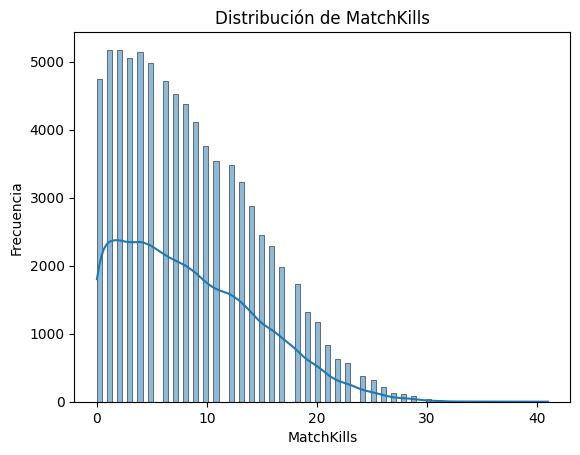

In [7]:
sns.histplot(df['MatchKills'], kde=True)
plt.title("Distribución de MatchKills")
plt.xlabel("MatchKills")
plt.ylabel("Frecuencia")
plt.show()

## 4. Preparación de Datos para el Modelo

In [8]:
variables = ['TimeAlive', 'MatchAssists', 'MatchHeadshots', 'TeamStartingEquipmentValue']
df_modelo = df[variables + ['MatchKills']].dropna()

X = df_modelo[variables]
y = df_modelo['MatchKills']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)



Modelo clasificacion




In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables seleccionadas
features = ['RoundHeadshots', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle', 'TimeAlive']
X = df[features]
y = df['RoundWinner']

# Separar y escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Precisión: 65.19 %
ROC AUC: 0.7178


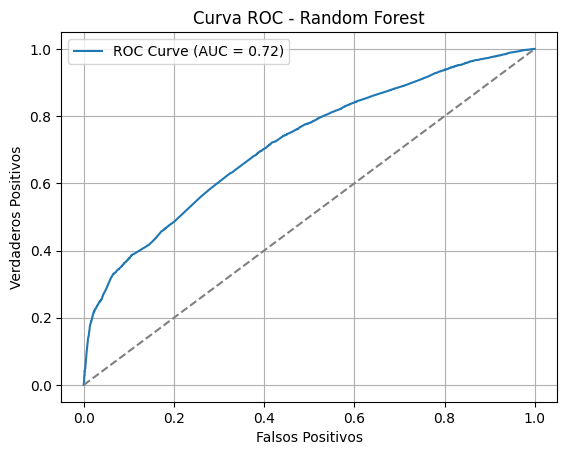

In [15]:
# 🔍 Modelo: Random Forest Classifier + ROC AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model_rf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Precisión:", round(accuracy * 100, 2), "%")
print("ROC AUC:", round(roc_auc, 4))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()

Modelo regresión

In [16]:
# Variables seleccionadas
features = ['RoundHeadshots', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle', 'TimeAlive']
target = 'RoundKills'  # Asegurarse de que esta variable exista en el CSV

X = df[features]
y = df[target]

# Separar y escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

R² Score: 0.476
MSE: 0.41


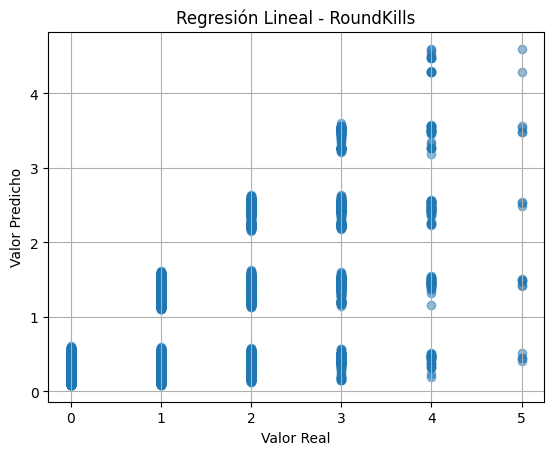

In [17]:
# 🔍 Modelo: Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("MSE:", round(mse, 2))

# Gráfico real vs predicción
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Regresión Lineal - RoundKills")
plt.grid()
plt.show()